## Análisis de los datos

## Descomentar para probar

Este primer paso se debe descomentar para poder probar el cuaderno de forma individual, es decir, para probarlo; de lo contrario, se debe mantener comentado para evitar posibles fallos por reprocesar los ficheros.

**NOTA**: _Tener mucho cuidado de no crear un bucle de ejecución de los cuadernos_. Si se van a realizar pruebas sobre este cuaderno, comentar la linea correspondiente a este cuaderno en el cuaderno principal (**0_all_steps.jpnb**)

Esta es línea a buscar:
~~~ shell
%run /content/drive/My\ Drive/Proyecto03/Notebooks_Proyecto/3_data_analysis.ipynb
~~~

El inicio de este script es a partir del titulo **Análisis de los datos**

~~~ python
# cargar datos
from google.colab import drive
drive.mount('/content/drive')
%run /content/drive/My\ Drive/Proyecto03/Notebooks_Proyecto/0_all_steps.ipynb
~~~

In [ ]:
print('*******************************************************************************************************')
print(' Analizando los datos ....')

In [ ]:
# Crear el directorio para guardar las imagenes de los resultados
! mkdir /content/images

## Análisis de datos

In [ ]:
# importar las bibliotecas que nos facilitarán la limpieza de los datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Comprobamos que el fichero esta dsiponible
cardio_nuevo = pd.read_csv('/content/datasets/cardio_nuevo.csv', sep=',', index_col = 0)

In [ ]:
cardio_nuevo.describe(include='all')

age        gender  ...        active        cardio
count  68199.000000  68199.000000  ...  68199.000000  68199.000000
mean      52.827959      1.349052  ...      0.803560      0.494597
std        6.765134      0.476674  ...      0.397308      0.499974
min       29.000000      1.000000  ...      0.000000      0.000000
25%       48.000000      1.000000  ...      1.000000      0.000000
50%       53.000000      1.000000  ...      1.000000      0.000000
75%       58.000000      2.000000  ...      1.000000      1.000000
max       64.000000      2.000000  ...      1.000000      1.000000

[8 rows x 12 columns]

### Relación de las características
Se evaluan con respecto a la variable objetivo

Text(0.5, 1.0, 'Relación del altura con respecto a enfermedad cardiaca')

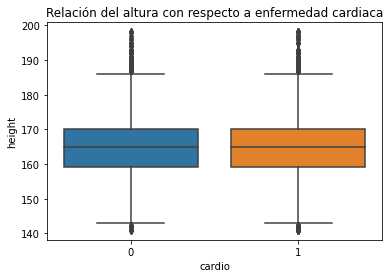

In [ ]:
# Evaluamos la relación del altura con respecto a la variable objetivo de enfermedad cardiaca
sns.boxplot(data = cardio_nuevo, y ='height', x ='cardio') \
  .set_title('Relación del altura con respecto a enfermedad cardiaca')

Text(0.5, 1.0, 'Relación del peso con respecto a enfermedad cardiaca')

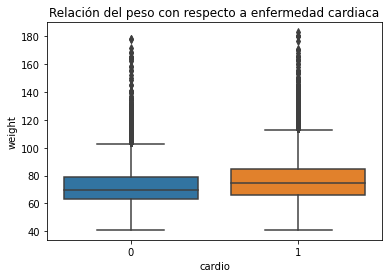

In [ ]:
# Evaluamos la relación del peso con respecto a la variable objetivo de enfermedad cardiaca
sns.boxplot(data = cardio_nuevo, y ='weight', x ='cardio') \
  .set_title('Relación del peso con respecto a enfermedad cardiaca')

Text(0.5, 1.0, 'Relación de la presión arterial sistólica con respecto a enfermedad cardiaca')

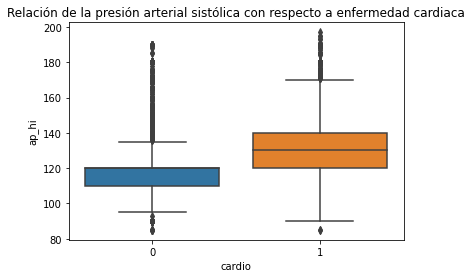

In [ ]:
# Evaluamos la relación de la presión arterial sistólica con respecto a la variable objetivo de enfermedad cardiaca
sns.boxplot(data = cardio_nuevo, y ='ap_hi', x ='cardio') \
  .set_title('Relación de la presión arterial sistólica con respecto a enfermedad cardiaca')

Text(0.5, 1.0, 'Relación de la presión arterial diastólica con respecto a enfermedad cardiaca')

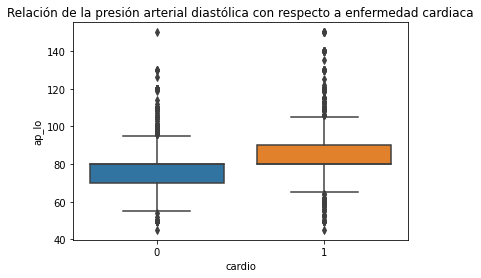

In [ ]:
# Evaluamos la relación de la presión arterial diastólica con respecto a la variable objetivo de enfermedad cardiaca
sns.boxplot(data = cardio_nuevo, y ='ap_lo', x ='cardio') \
  .set_title('Relación de la presión arterial diastólica con respecto a enfermedad cardiaca')

Text(0.5, 1.02, 'Relación de la presión arterial con respecto a enfermedad cardiaca')

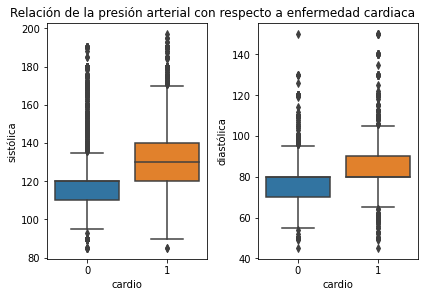

In [ ]:
cardio_ap = cardio_nuevo.rename(columns={'ap_hi':'sistólica','ap_lo':'diastólica'})
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data = cardio_ap, y ='sistólica', x ='cardio', ax=axs[0])
sns.boxplot(data = cardio_ap, y ='diastólica', x ='cardio', ax=axs[1])
fig.tight_layout()
fig.suptitle('Relación de la presión arterial con respecto a enfermedad cardiaca', y = 1.02)

Text(0.5, 1.0, 'Relación de la edad con respecto a enfermedad cardiaca')

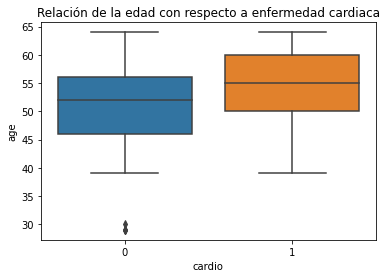

In [ ]:
# Evaluamos la relación de la edad con respecto a la variable objetivo de enfermedad cardiaca
sns.boxplot(data = cardio_nuevo, y ='age', x ='cardio') \
  .set_title('Relación de la edad con respecto a enfermedad cardiaca')

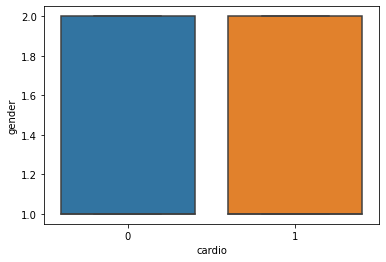

In [ ]:
# Evaluamos la relación del género con respecto a la variable objetivo de enfermedad cardiaca
sns.boxplot(data = cardio_nuevo, y ='gender', x ='cardio') \
  .set_title('Relación del género con respecto a enfermedad cardiaca')

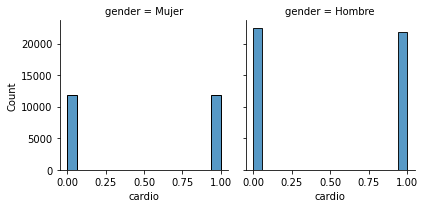

In [ ]:
dict_genero = {1:'Hombre', 2:'Mujer'}
cardio_genero = cardio_nuevo.replace({'gender':dict_genero})
g = sns.FacetGrid(cardio_genero, col="gender")
g.map(sns.histplot, "cardio")

Text(0.5, 1.0, 'Relación de la presión arterial diastólica y el genero con respecto a enfermedad cardiaca')

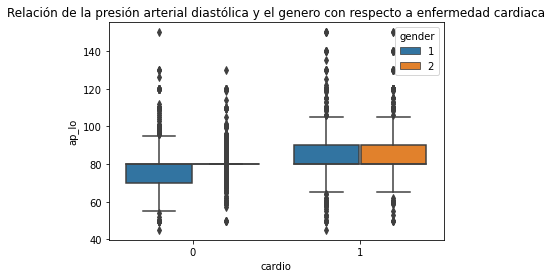

In [ ]:
# incluimos la relacion del genéro
sns.boxplot(data = cardio_nuevo, y ='ap_lo', x ='cardio', hue='gender') \
  .set_title('Relación de la presión arterial diastólica y el genero con respecto a enfermedad cardiaca')

In [ ]:
# Quitamos las variables categoricas 
cardio_sin_categoricas = cardio_nuevo.drop(columns=['age','gender','cholesterol','gluc', 'smoke', 'alco', 'active', 'cardio'])

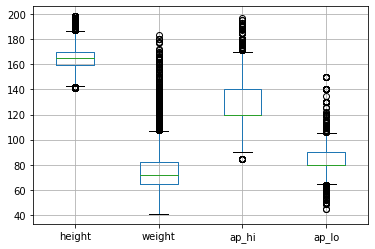

In [ ]:
#BOXPLOT
cardio_sin_categoricas.boxplot()

<Figure size 1296x1296 with 0 Axes>

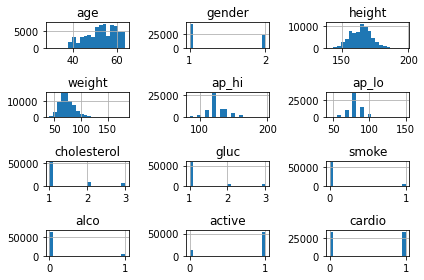

In [ ]:
#HISTOGRAMA
plt.figure(figsize=(18,18))
cardio_nuevo.hist(bins=20)
plt.tight_layout()

In [ ]:
cardio_genero['gender'].value_counts()

Hombre    44394
Mujer     23805
Name: gender, dtype: int64

In [ ]:
dict_cholesterol = {1:'Bajo', 2:'Medio', 3:'Alto'}
cardio_cholesterol = cardio_nuevo.replace({'cholesterol':dict_cholesterol})
cardio_cholesterol['cholesterol'].value_counts()

Bajo     51170
Medio     9209
Alto      7820
Name: cholesterol, dtype: int64

In [ ]:
dict_gluc = {1:'Bajo', 2:'Medio', 3:'Alto'}
cardio_gluc = cardio_nuevo.replace({'gluc':dict_gluc})
cardio_gluc['gluc'].value_counts()

Bajo     58007
Alto      5185
Medio     5007
Name: gluc, dtype: int64

In [ ]:
dict_smoke = {0:'No', 1:'Si'}
cardio_smoke = cardio_nuevo.replace({'smoke':dict_smoke})
cardio_smoke['smoke'].value_counts()

No    62202
Si     5997
Name: smoke, dtype: int64

In [ ]:
dict_alco = {0:'No', 1:'Si'}
cardio_alco = cardio_nuevo.replace({'alco':dict_alco})
cardio_alco['alco'].value_counts()

No    64558
Si     3641
Name: alco, dtype: int64

In [ ]:
dict_active = {0:'No', 1:'Si'}
cardio_active = cardio_nuevo.replace({'active':dict_active})
cardio_active['active'].value_counts()

Si    54802
No    13397
Name: active, dtype: int64

In [ ]:
cardio_nuevo['ap_hi'].value_counts()

120    27574
140     9285
130     8879
110     8586
150     4187
       ...  
97         1
93         1
197        1
184        1
187        1
Name: ap_hi, Length: 97, dtype: int64

In [ ]:
cardio_nuevo['ap_lo'].value_counts()

80     34628
90     14200
70     10149
100     4018
60      2642
       ...  
122        1
135        1
126        1
125        1
54         1
Name: ap_lo, Length: 78, dtype: int64

In [ ]:
cardio_nuevo['ap_hi'].values.max()#Max valor en los datos

197

In [ ]:
cardio_nuevo['ap_lo'].values.max()#Max valor en los datos

150

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


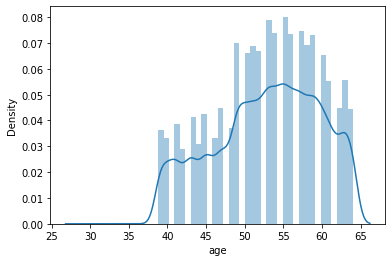

In [ ]:
sns.distplot(cardio_nuevo['age']) #Grafica de edades

In [ ]:
sns.countplot(cardio_nuevo['age']) #Grafica de edades

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


### Comparación de las características

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


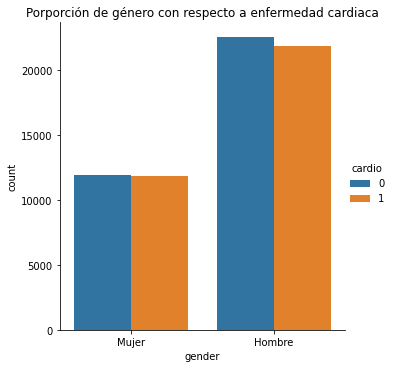

In [ ]:
sns.catplot('gender', data=cardio_genero, kind='count', hue='cardio', aspect=1)
plt.title('Porporción de género con respecto a enfermedad cardiaca')
plt.savefig('images/Género.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


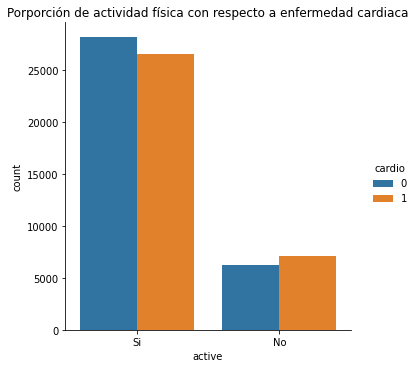

In [ ]:
sns.catplot('active', data=cardio_active, kind='count', hue='cardio',aspect=1)
plt.title('Porporción de actividad física con respecto a enfermedad cardiaca')
plt.savefig('images/Actividad.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


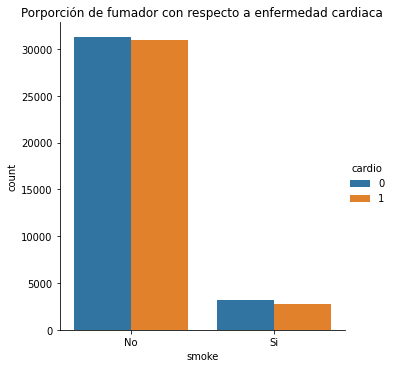

In [ ]:
sns.catplot('smoke', data=cardio_smoke, kind='count', hue='cardio',aspect=1)
plt.title('Porporción de fumador con respecto a enfermedad cardiaca')
plt.savefig('images/Fumador.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


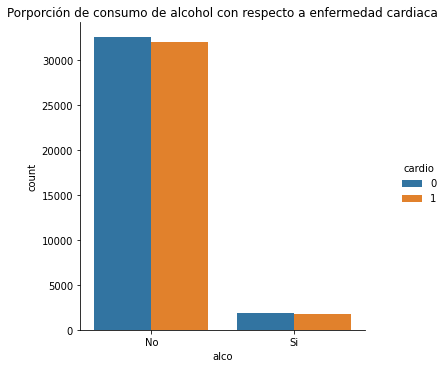

In [ ]:
sns.catplot('alco', data=cardio_alco, kind='count', hue='cardio',aspect=1)
plt.title('Porporción de consumo de alcohol con respecto a enfermedad cardiaca')
plt.savefig('images/Alcohol.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


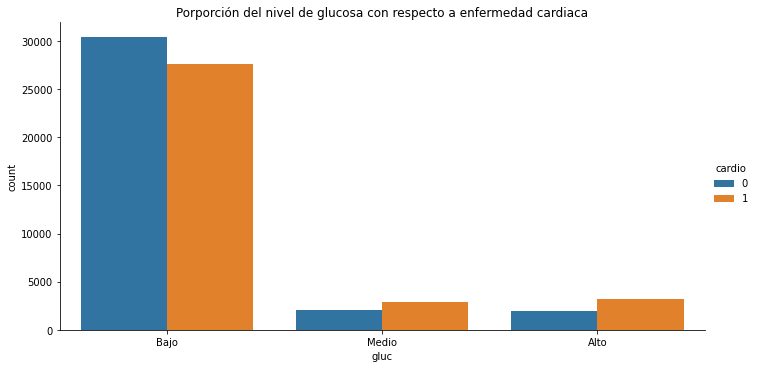

In [ ]:
sns.catplot('gluc', data=cardio_gluc, kind='count', hue='cardio',aspect=2)
plt.title('Porporción del nivel de glucosa con respecto a enfermedad cardiaca')
plt.savefig('images/Glucosa.png')

In [ ]:
sns.catplot('cholesterol', data=cardio_cholesterol, kind='count', hue='cardio',aspect=2)
plt.title('Porporción del nivel de colesterol con respecto a enfermedad cardiaca')
plt.savefig('images/Colesterol.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


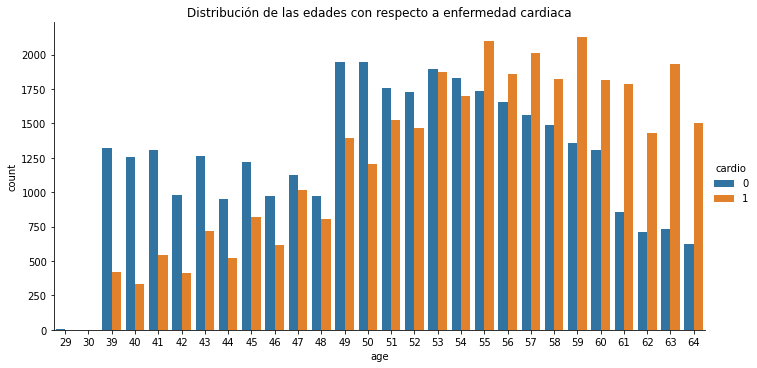

In [ ]:
sns.catplot('age', data=cardio_nuevo, kind='count', hue='cardio',aspect=2)
plt.title('Distribución de las edades con respecto a enfermedad cardiaca')
plt.savefig('images/Edad.png')

In [ ]:
sns.boxplot(data = cardio_genero, y ='gender', x ='cardio').set_title('Género con relación a enfermedad cardíaca')
plt.savefig('images/gender.png')

In [ ]:
ax = sns.violinplot(x ="cardio", y ="ap_hi", data=cardio_nuevo, hue='cardio').set_title('Presión sistólica con relación a enfermedad cardíaca')
plt.savefig('images/Presión Sistólica.png')

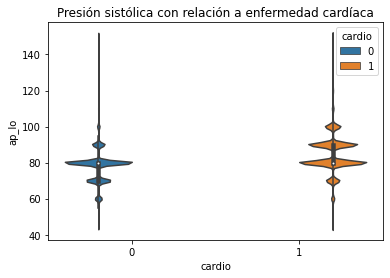

In [ ]:
ax = sns.violinplot(x ="cardio", y ="ap_lo", data=cardio_nuevo, hue='cardio').set_title('Presión sistólica con relación a enfermedad cardíaca')
plt.savefig('images/Presión Diastólica.png')

### Coorelación entre variables - Mapa de calor

In [ ]:
corr = cardio_nuevo.corr()

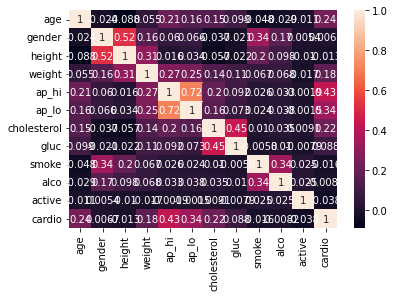

In [ ]:
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True)

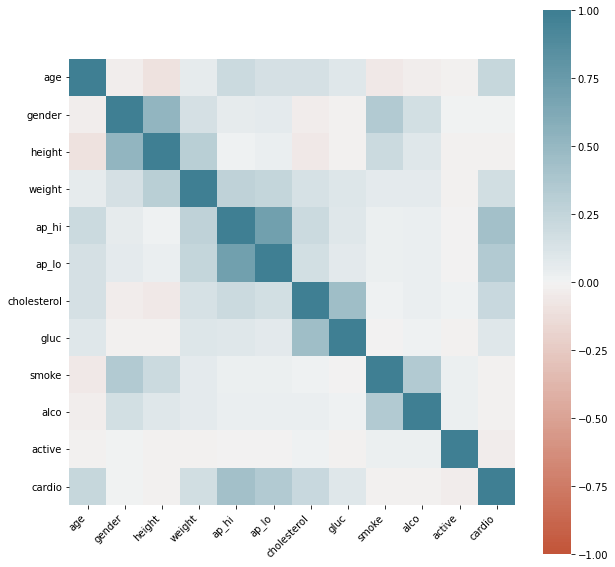

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
corr = cardio_nuevo.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig('images/Mapa de carlor.png')

In [ ]:
print('Análiis generado!')
print('*******************************************************************************************************')